In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_path = './Data/Merged Data/Modified'

In [3]:
# Load the data for a specific sector from its CSV file
sector_data = pd.read_csv(f"{dataset_path}/Power_mod.csv")

In [4]:
# Display basic information about the dataset
print(sector_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3132 non-null   object 
 1   Symbol              3132 non-null   object 
 2   Series              3132 non-null   object 
 3   Prev Close          3132 non-null   float64
 4   Open                3132 non-null   float64
 5   High                3132 non-null   float64
 6   Low                 3132 non-null   float64
 7   Last                3132 non-null   float64
 8   Close               3132 non-null   float64
 9   VWAP                3132 non-null   float64
 10  Volume              3132 non-null   int64  
 11  Turnover            3132 non-null   int64  
 12  Trades              3132 non-null   int64  
 13  Deliverable Volume  3132 non-null   int64  
 14  %Deliverble         3132 non-null   float64
dtypes: float64(8), int64(4), object(3)
memory usage: 367.2+

In [5]:
# Summary statistics of the dataset
print(sector_data.describe())

        Prev Close         Open         High          Low         Last  \
count  3132.000000  3132.000000  3132.000000  3132.000000  3132.000000   
mean    159.119285   159.247430   161.160409   157.222063   159.123020   
std      33.804682    33.826915    34.078301    33.565759    33.794634   
min      76.400000    74.900000    79.600000    73.200000    77.000000   
25%     136.137500   136.287500   138.000000   134.987500   136.337500   
50%     159.600000   160.000000   161.700000   158.000000   159.575000   
75%     187.212500   187.312500   189.500000   185.100000   187.362500   
max     236.500000   234.400000   238.300000   228.750000   235.250000   

             Close         VWAP        Volume      Turnover         Trades  \
count  3132.000000  3132.000000  3.132000e+03  3.132000e+03    3132.000000   
mean    159.132216   159.180731  8.687126e+06  1.266287e+14   47008.527139   
std      33.834189    33.812217  1.116706e+07  1.439214e+14   31602.132597   
min      76.400000   

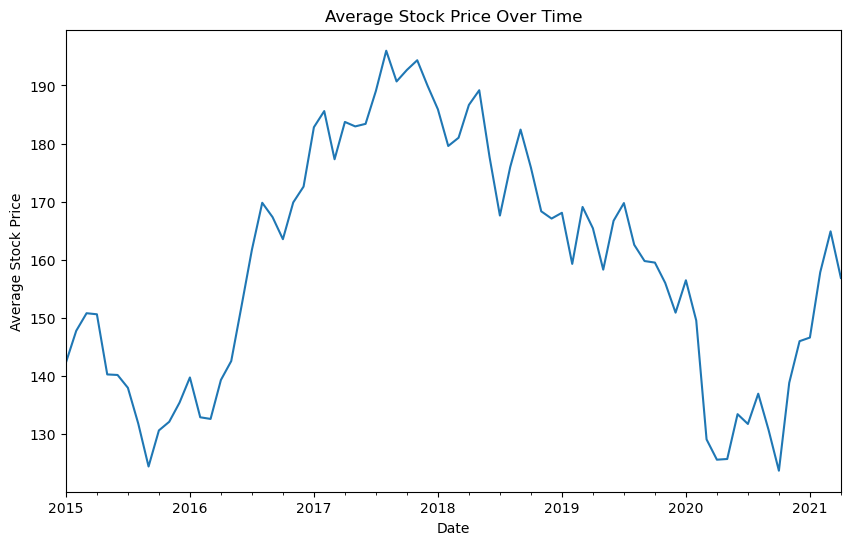

In [6]:
# Plotting average stock price over time
plt.figure(figsize=(10, 6))
sector_data['Date'] = pd.to_datetime(sector_data['Date'])
sector_data.set_index('Date', inplace=True)
sector_data['Close'].resample('M').mean().plot()
plt.title('Average Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.show()

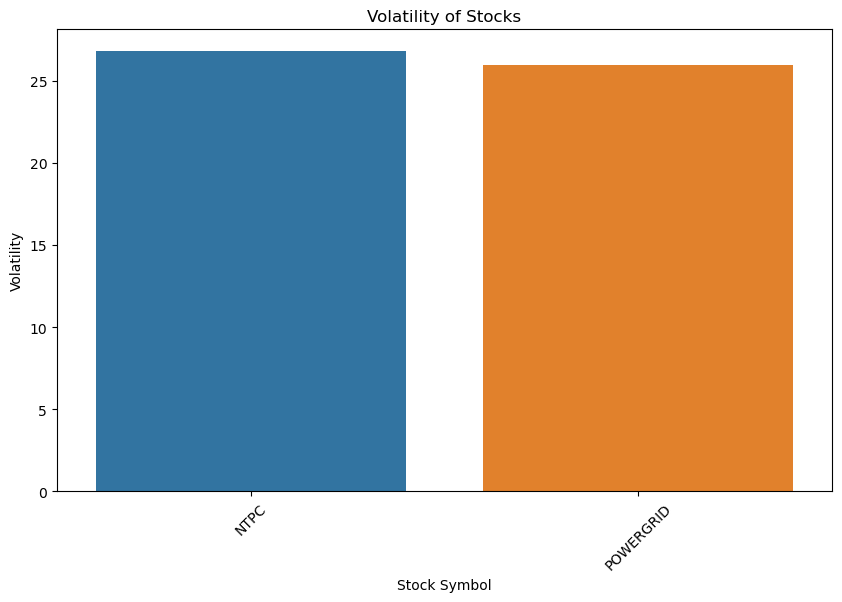

In [7]:
# Calculate volatility of stocks
volatility = sector_data.groupby('Symbol')['Close'].std().sort_values(ascending=False)

# Plotting volatility of stocks
plt.figure(figsize=(10, 6))
sns.barplot(x=volatility.index, y=volatility.values)
plt.title('Volatility of Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.show()

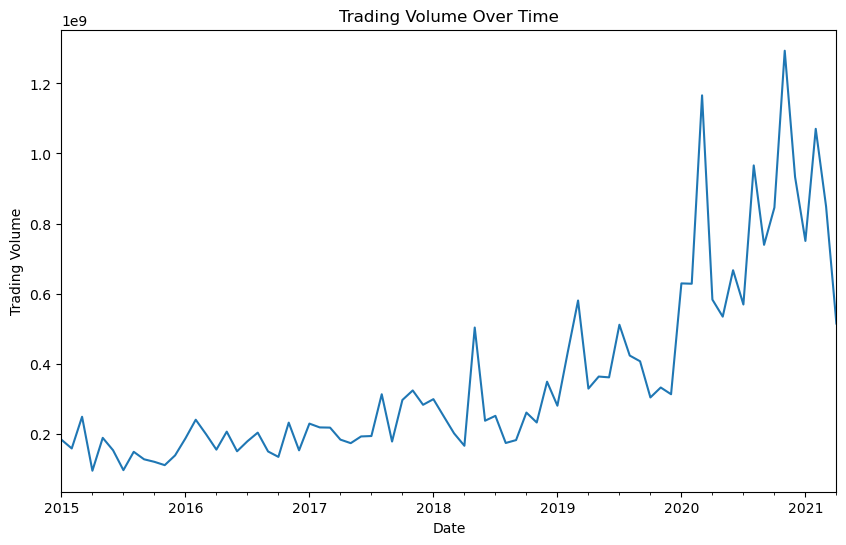

In [8]:
# Plotting trading volume over time
plt.figure(figsize=(10, 6))
sector_data['Volume'].resample('M').sum().plot()
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.show()

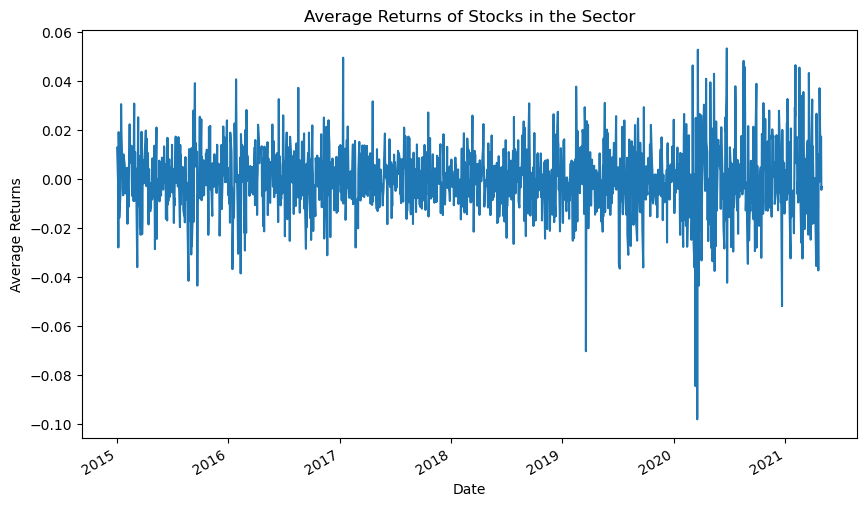

In [9]:
# Calculate daily returns for each stock
sector_data['Return'] = sector_data.groupby('Symbol')['Close'].pct_change()

# Calculate average returns for all stocks in the sector
average_returns = sector_data.groupby('Date')['Return'].mean()

# Plotting average returns over time
plt.figure(figsize=(10, 6))
average_returns.plot()
plt.title('Average Returns of Stocks in the Sector')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.show()

In [10]:
sector_data.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Return
Date,,,,,,,,,,,,,,,
2015-01-01,NTPC,EQ,144.00,144.20,144.25,142.10,142.20,142.45,142.72,1232484,17589843055000,6613,710769,0.5767,NaN
2015-01-02,NTPC,EQ,142.45,142.50,145.00,142.50,145.00,144.40,144.21,1985911,28638979315000,19613,1176616,0.5925,0.013689
2015-01-05,NTPC,EQ,144.40,144.55,144.90,143.05,143.65,144.00,143.77,1830881,26322813665000,14367,1034618,0.5651,-0.002770
2015-01-06,NTPC,EQ,144.00,143.50,144.50,138.25,138.90,139.20,141.18,4936260,69691059740000,28225,3023908,0.6126,-0.033333
2015-01-07,NTPC,EQ,139.20,140.50,143.00,139.35,142.95,142.55,141.61,4873796,69018054870000,39472,3453456,0.7086,0.024066


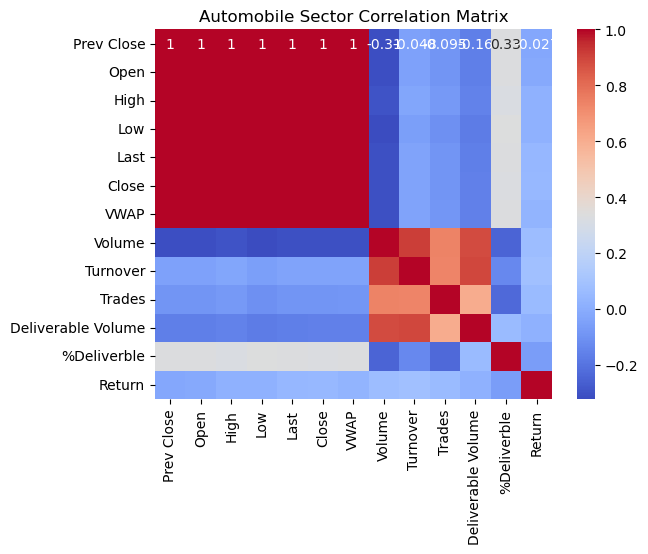

In [11]:
# Visualize the correlation matrix
sector_correlation = sector_data.drop(['Symbol','Series'], axis = 1).corr()
sns.heatmap(sector_correlation, annot=True, cmap='coolwarm')
plt.title('Automobile Sector Correlation Matrix')
plt.show()

From the above correlation heatmap, we can observe the columns 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', and 'VWAP' are highly correlated which introduces Multi-collinearity.

Defining another feature, Relative Strength Index(RSI) which indicates overbought or oversold conditions for each stock in the sector,

In [14]:
def rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [15]:
# Assuming 'data' is a DataFrame with columns: Date, Open, High, Low, Close, Volume
sector_data['RSI'] = rsi(sector_data, window=14)

In [16]:
sector_data.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Return,RSI
Date,,,,,,,,,,,,,,,,
2015-01-01,NTPC,EQ,144.00,144.20,144.25,142.10,142.20,142.45,142.72,1232484,17589843055000,6613,710769,0.5767,NaN,NaN
2015-01-02,NTPC,EQ,142.45,142.50,145.00,142.50,145.00,144.40,144.21,1985911,28638979315000,19613,1176616,0.5925,0.013689,NaN
2015-01-05,NTPC,EQ,144.40,144.55,144.90,143.05,143.65,144.00,143.77,1830881,26322813665000,14367,1034618,0.5651,-0.002770,NaN
2015-01-06,NTPC,EQ,144.00,143.50,144.50,138.25,138.90,139.20,141.18,4936260,69691059740000,28225,3023908,0.6126,-0.033333,NaN
2015-01-07,NTPC,EQ,139.20,140.50,143.00,139.35,142.95,142.55,141.61,4873796,69018054870000,39472,3453456,0.7086,0.024066,NaN


In [17]:
sector_data.fillna(method='bfill', inplace=True)
sector_data.head(5)

/tmp/ipykernel_86507/4260664688.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sector_data.fillna(method='bfill', inplace=True)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Return,RSI
Date,,,,,,,,,,,,,,,,
2015-01-01,NTPC,EQ,144.00,144.20,144.25,142.10,142.20,142.45,142.72,1232484,17589843055000,6613,710769,0.5767,0.013689,50.793651
2015-01-02,NTPC,EQ,142.45,142.50,145.00,142.50,145.00,144.40,144.21,1985911,28638979315000,19613,1176616,0.5925,0.013689,50.793651
2015-01-05,NTPC,EQ,144.40,144.55,144.90,143.05,143.65,144.00,143.77,1830881,26322813665000,14367,1034618,0.5651,-0.002770,50.793651
2015-01-06,NTPC,EQ,144.00,143.50,144.50,138.25,138.90,139.20,141.18,4936260,69691059740000,28225,3023908,0.6126,-0.033333,50.793651
2015-01-07,NTPC,EQ,139.20,140.50,143.00,139.35,142.95,142.55,141.61,4873796,69018054870000,39472,3453456,0.7086,0.024066,50.793651


Any stock with RSI over 70 indicates that it has been overbought and a price correction is incoming while and RSI less than 30 indicates that the stock has been oversold and a bounce back of the stock price is expected.

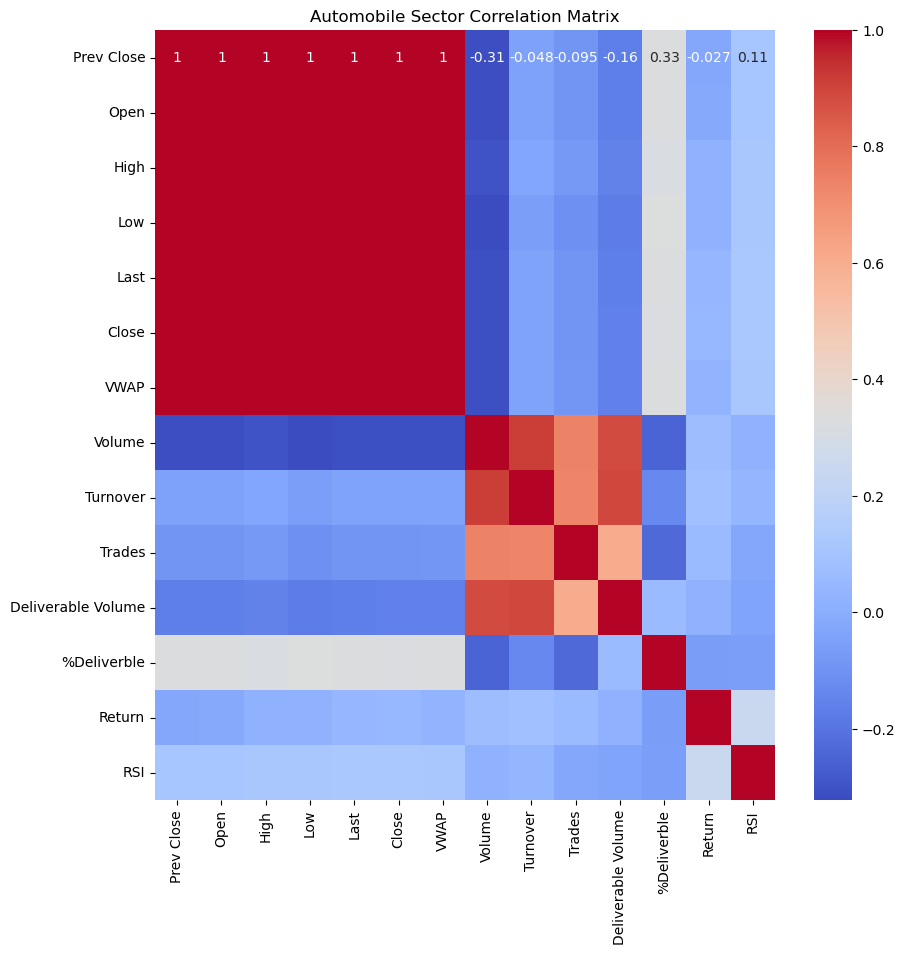

In [19]:
# Visualize the correlation matrix
plt.figure(figsize=(10,10))
sector_correlation = sector_data.drop(['Symbol','Series'], axis = 1).corr()
sns.heatmap(sector_correlation, annot=True, cmap='coolwarm')
plt.title('Automobile Sector Correlation Matrix')
plt.show()

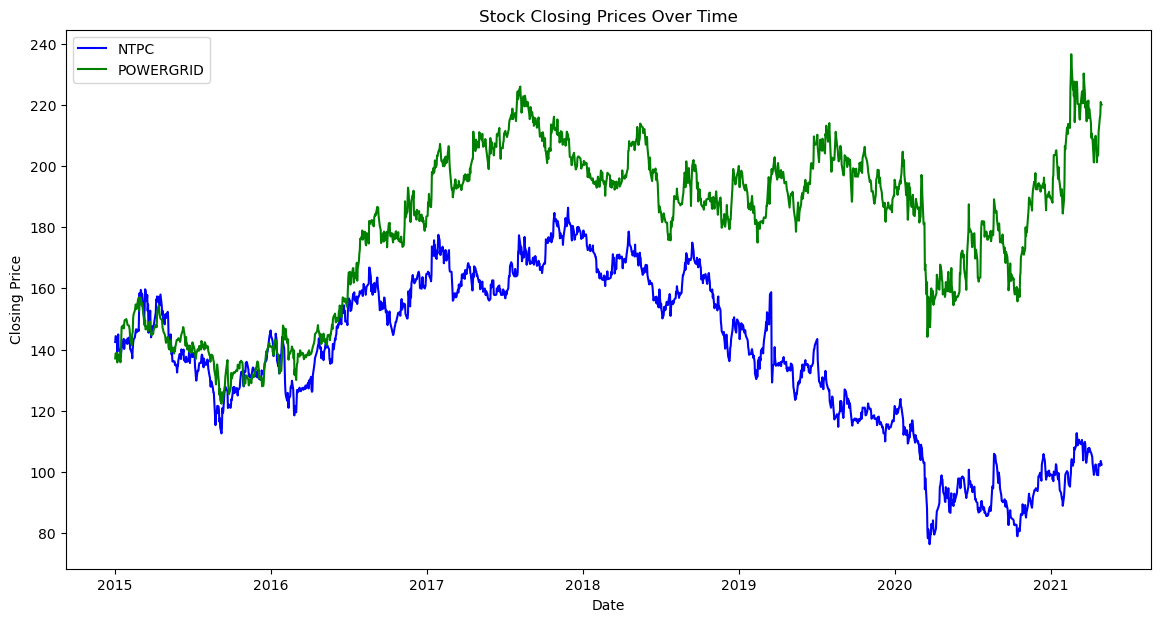

In [20]:
# Load the dataset
df = pd.read_csv('./Data/Merged Data/Modified/Power_mod.csv', parse_dates=['Date'])

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Filter the DataFrame for each stock and plot
stocks = ['NTPC', 'POWERGRID']
colors = ['blue', 'green']  # Assign a color to each stock

plt.figure(figsize=(14, 7))

for stock, color in zip(stocks, colors):
    stock_df = df[df['Symbol'] == stock]
    plt.plot(stock_df.index, stock_df['Close'], label=stock, color=color)

plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

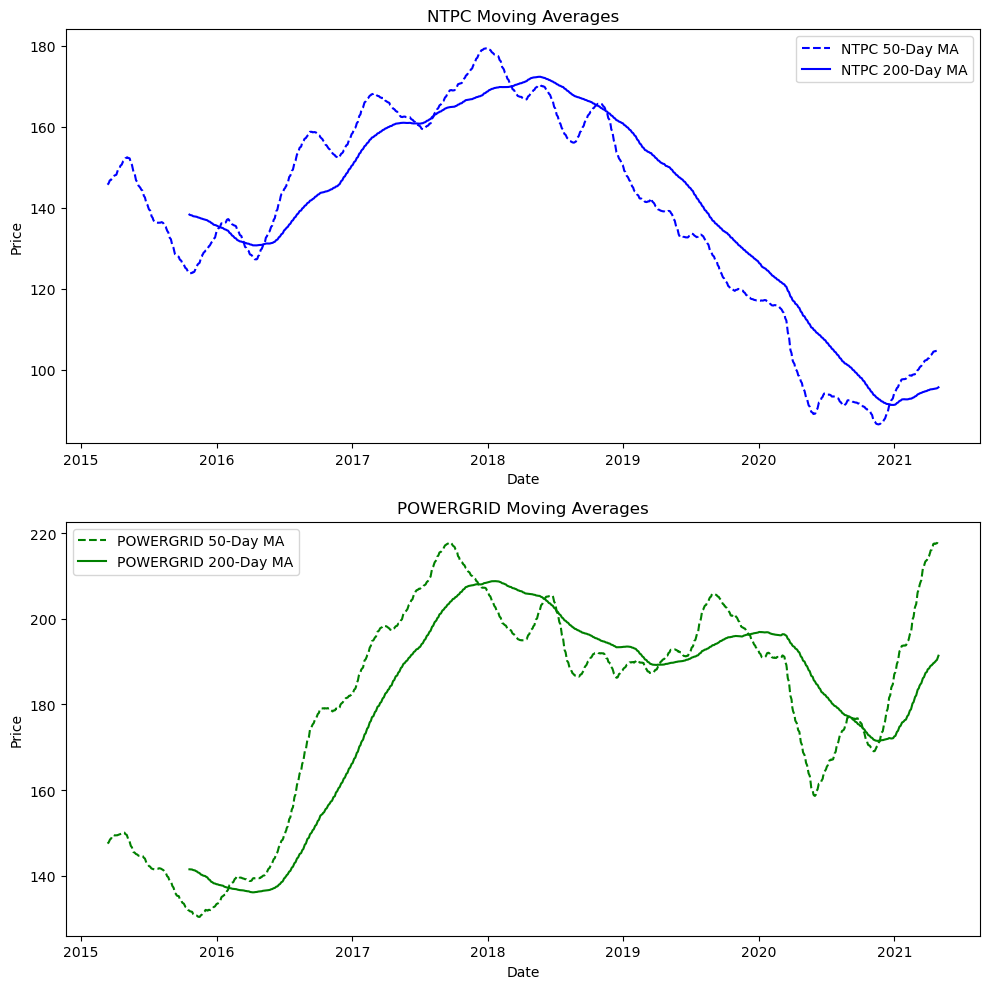

In [21]:
# Get unique stock symbols
unique_symbols = df['Symbol'].unique()

# Colors for each stock
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
color_map = dict(zip(unique_symbols, colors))

# Plotting
fig, axs = plt.subplots(len(unique_symbols), 1, figsize=(10, 5 * len(unique_symbols)))

for i, symbol in enumerate(unique_symbols):
    stock_df = df[df['Symbol'] == symbol].copy()
    
    # Calculate moving averages
    stock_df['50_MA'] = stock_df['Close'].rolling(window=50).mean()
    stock_df['200_MA'] = stock_df['Close'].rolling(window=200).mean()
    
    # Plot
    axs[i].plot(stock_df.index, stock_df['50_MA'], label=f'{symbol} 50-Day MA', color=color_map[symbol], linestyle='--')
    axs[i].plot(stock_df.index, stock_df['200_MA'], label=f'{symbol} 200-Day MA', color=color_map[symbol], linestyle='-')
    axs[i].set_title(f'{symbol} Moving Averages')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Price')
    axs[i].legend()

plt.tight_layout()
plt.show()

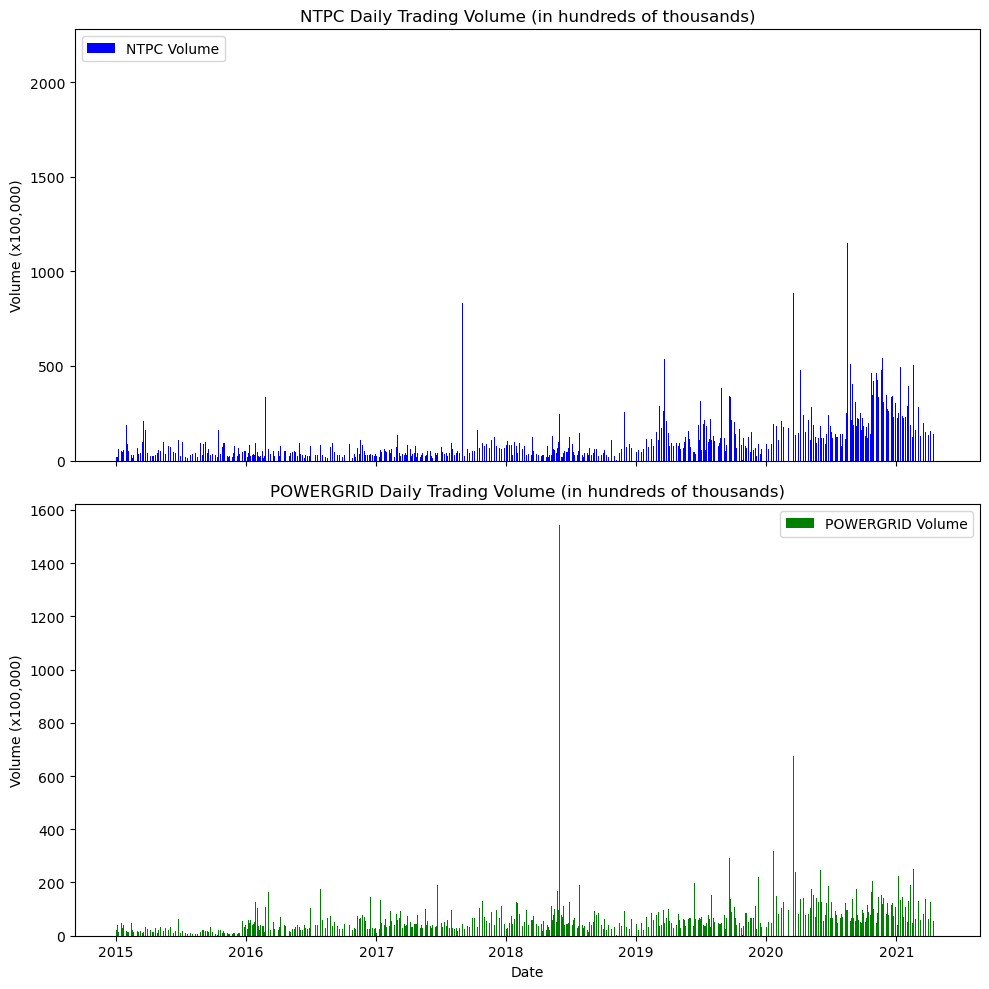

In [22]:
# Convert 'Volume' from 1e6 to 1e8 to a scale of 100,000
df['Volume'] = df['Volume'] / 100000

# Plotting the daily trading volume for each stock in separate charts with unique colors for each stock
unique_symbols = df['Symbol'].unique()
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
color_map = dict(zip(unique_symbols, colors))

# Plotting
fig, axs = plt.subplots(len(unique_symbols), 1, figsize=(10, 5 * len(unique_symbols)), sharex=True)

for i, symbol in enumerate(unique_symbols):
    stock_df = df[df['Symbol'] == symbol].copy()
    axs[i].bar(stock_df.index, stock_df['Volume'], label=f'{symbol} Volume', color=color_map[symbol])
    axs[i].set_title(f'{symbol} Daily Trading Volume (in hundreds of thousands)')
    axs[i].set_ylabel('Volume (x100,000)')
    axs[i].legend()

# Set common labels
plt.xlabel('Date')
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

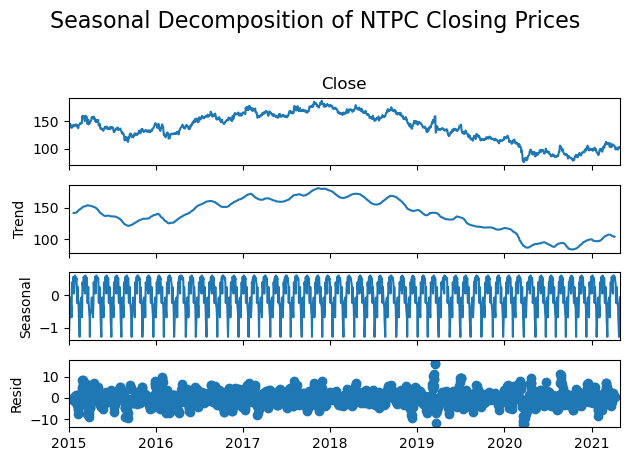

<Figure size 1000x800 with 0 Axes>

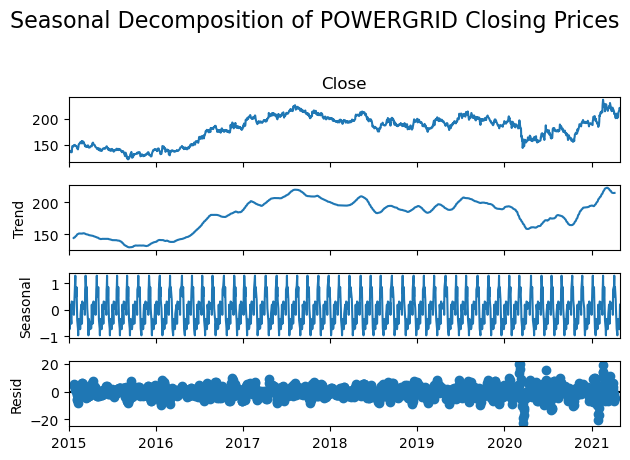

In [23]:
# Plotting seasonal decomposition for each stock
from statsmodels.tsa.seasonal import seasonal_decompose

for stock in unique_symbols:
    # Filter the DataFrame for the current stock
    stock_df = df[df['Symbol'] == stock].copy()
    
    # Ensure the DataFrame is sorted by date
    stock_df = stock_df.sort_index()
    
    # We'll use 'Close' price for decomposition
    # Note: The frequency (period) is an important parameter that might need adjustment
    # based on the stock and the available data points. Here, a generic weekly frequency (7) is used.
    result = seasonal_decompose(stock_df['Close'], model='additive', period=30)
    
    # Plotting
    plt.figure(figsize=(10, 8))
    result.plot()
    plt.suptitle(f'Seasonal Decomposition of {stock} Closing Prices', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to make space for the suptitle
    plt.show()

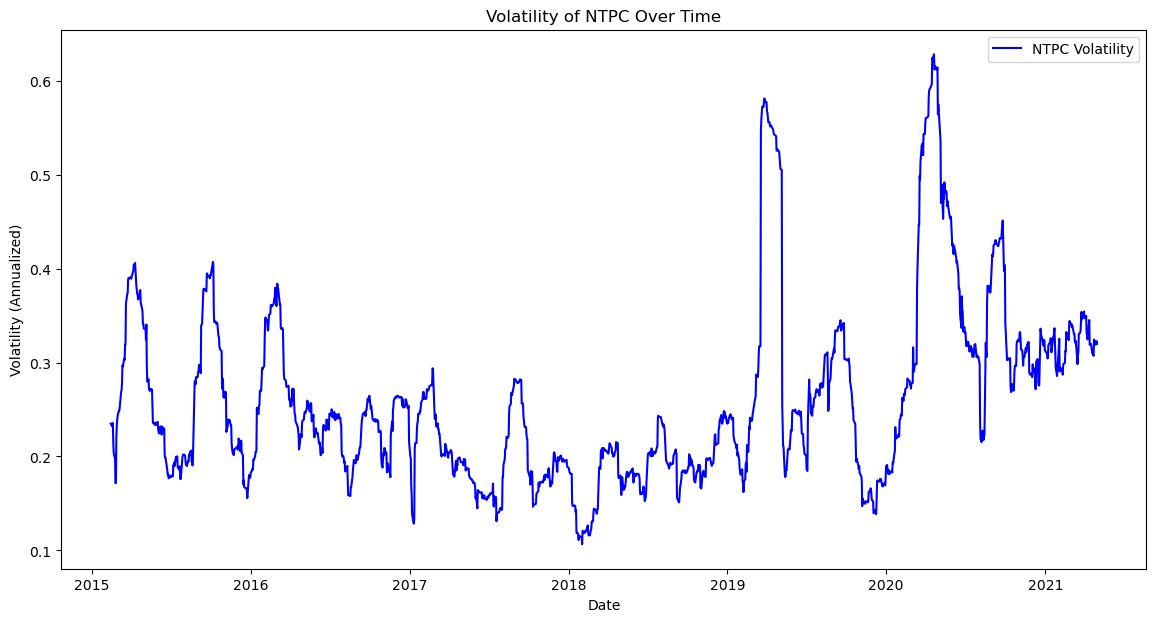

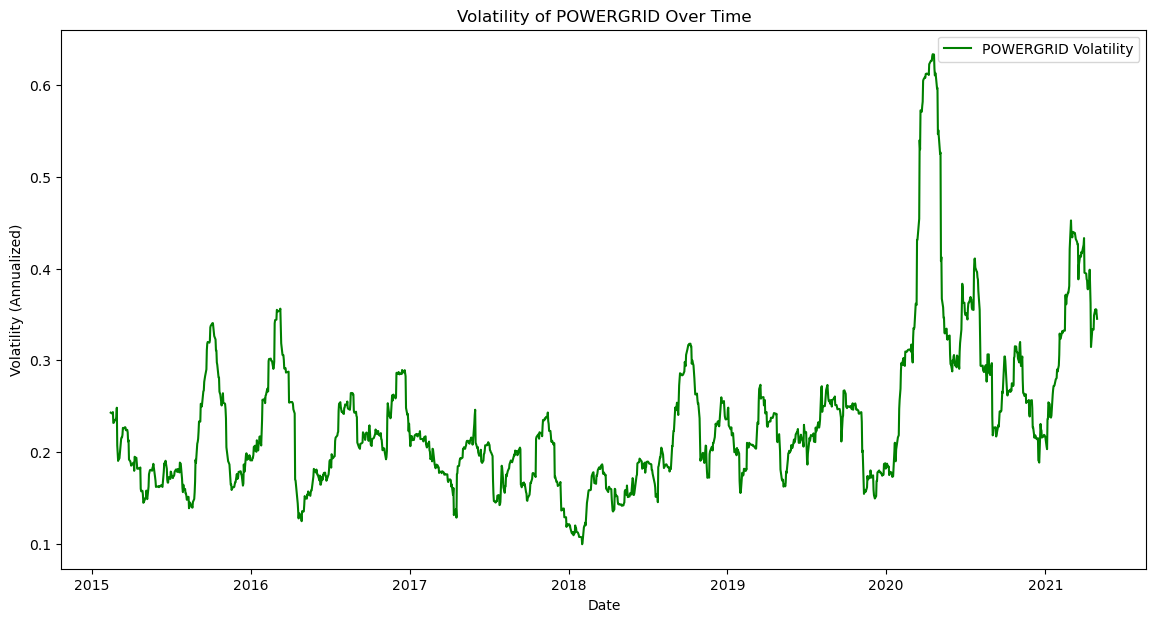

In [24]:
# Calculate daily returns as percentage change in the 'Close' price
df['Daily_Return'] = df.groupby('Symbol')['Close'].pct_change()

# Define a function to calculate the rolling standard deviation
def calculate_volatility(x, window):
    return x.rolling(window).std() * (252 ** 0.5)  # Annualize the volatility

# Apply the function to each group
window = 30  # You can adjust the window size as needed
volatility = df.groupby('Symbol')['Daily_Return'].apply(calculate_volatility, window)

# Since the result is a MultiIndex Series, reset the index to make it a DataFrame
volatility = volatility.reset_index()

# Merge the volatility data back into the original DataFrame
df = df.reset_index().merge(volatility, on=['Date', 'Symbol'], how='left')

# Rename the columns for clarity
df.rename(columns={'Daily_Return_x': 'Daily_Return', 'Daily_Return_y': 'Volatility'}, inplace=True)

# Get unique stock symbols
unique_symbols = df['Symbol'].unique()

# Colors for each stock
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
color_map = dict(zip(unique_symbols, colors))

# Plotting volatility for each stock in separate charts
for symbol in unique_symbols:
    stock_df = df[df['Symbol'] == symbol].copy()
    plt.figure(figsize=(14, 7))
    plt.plot(stock_df['Date'], stock_df['Volatility'], label=f'{symbol} Volatility', color=color_map[symbol])
    plt.title(f'Volatility of {symbol} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Volatility (Annualized)')
    plt.legend()
    plt.show()

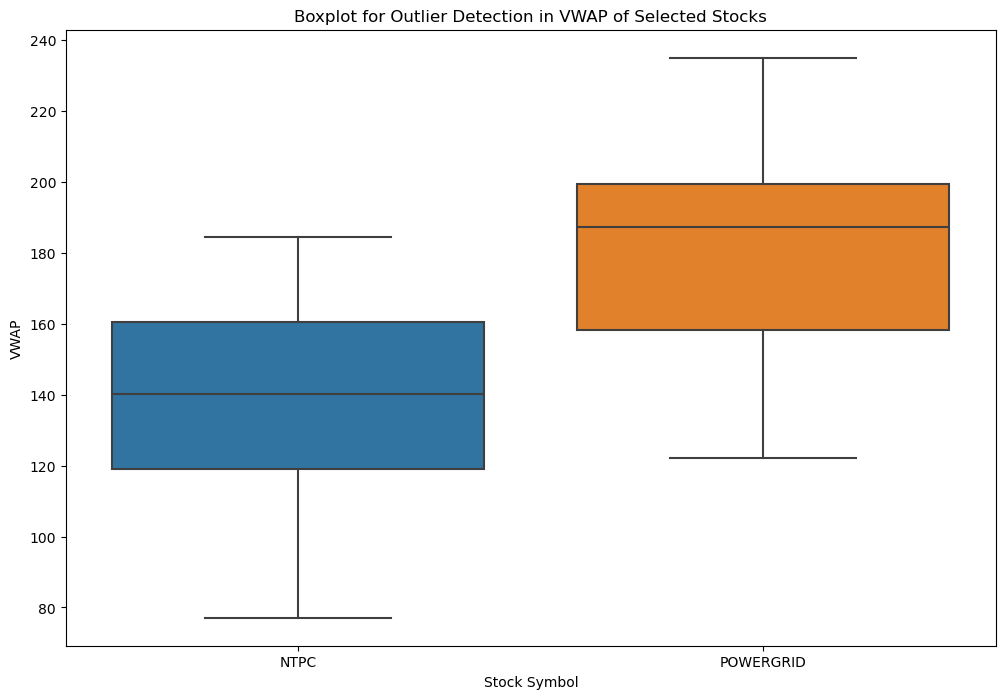

In [25]:
# Filter the DataFrame for the selected stocks
#selected_stocks = ['TATAMOTORS', 'MARUTI', 'M&M', 'HEROMOTOCO', 'BAJAJ-AUTO']
df_filtered = df[df['Symbol'].isin(unique_symbols)]

# Plotting boxplots for each stock using VWAP
plt.figure(figsize=(12, 8))
sns.boxplot(x='Symbol', y='VWAP', data=df_filtered)
plt.title('Boxplot for Outlier Detection in VWAP of Selected Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('VWAP')
plt.show()